In [1]:
from glotaran.io import load_parameters

parameters = load_parameters("models/parameters_guidance.yml")

In [4]:
from glotaran.utils.json_schema import create_model_scheme_json_schema

create_model_scheme_json_schema("models/schema.json",parameters)

In [5]:
from glotaran.io import load_scheme

scheme = load_scheme("models/scheme_guidance.yml")

In [6]:
from glotaran.io import load_dataset

scheme.load_data(
        {
            "dataset1": load_dataset("data/Npq2_220219_800target3fasea.ascii"),
            "dataset2": load_dataset("data/trNpq2_220219_800target3fase10SAS5.ascii"),
        }
)

In [7]:
result=scheme.optimize(parameters=parameters,maximum_number_function_evaluations=23)

D:\git\pyglotaran-staging\pyglotaran\glotaran\optimization\optimization.py:134: UserWarning: Optimization failed:

's4' is not in list
  warn(f"Optimization failed:\n\n{e}")


ValueError: 's4' is not in list

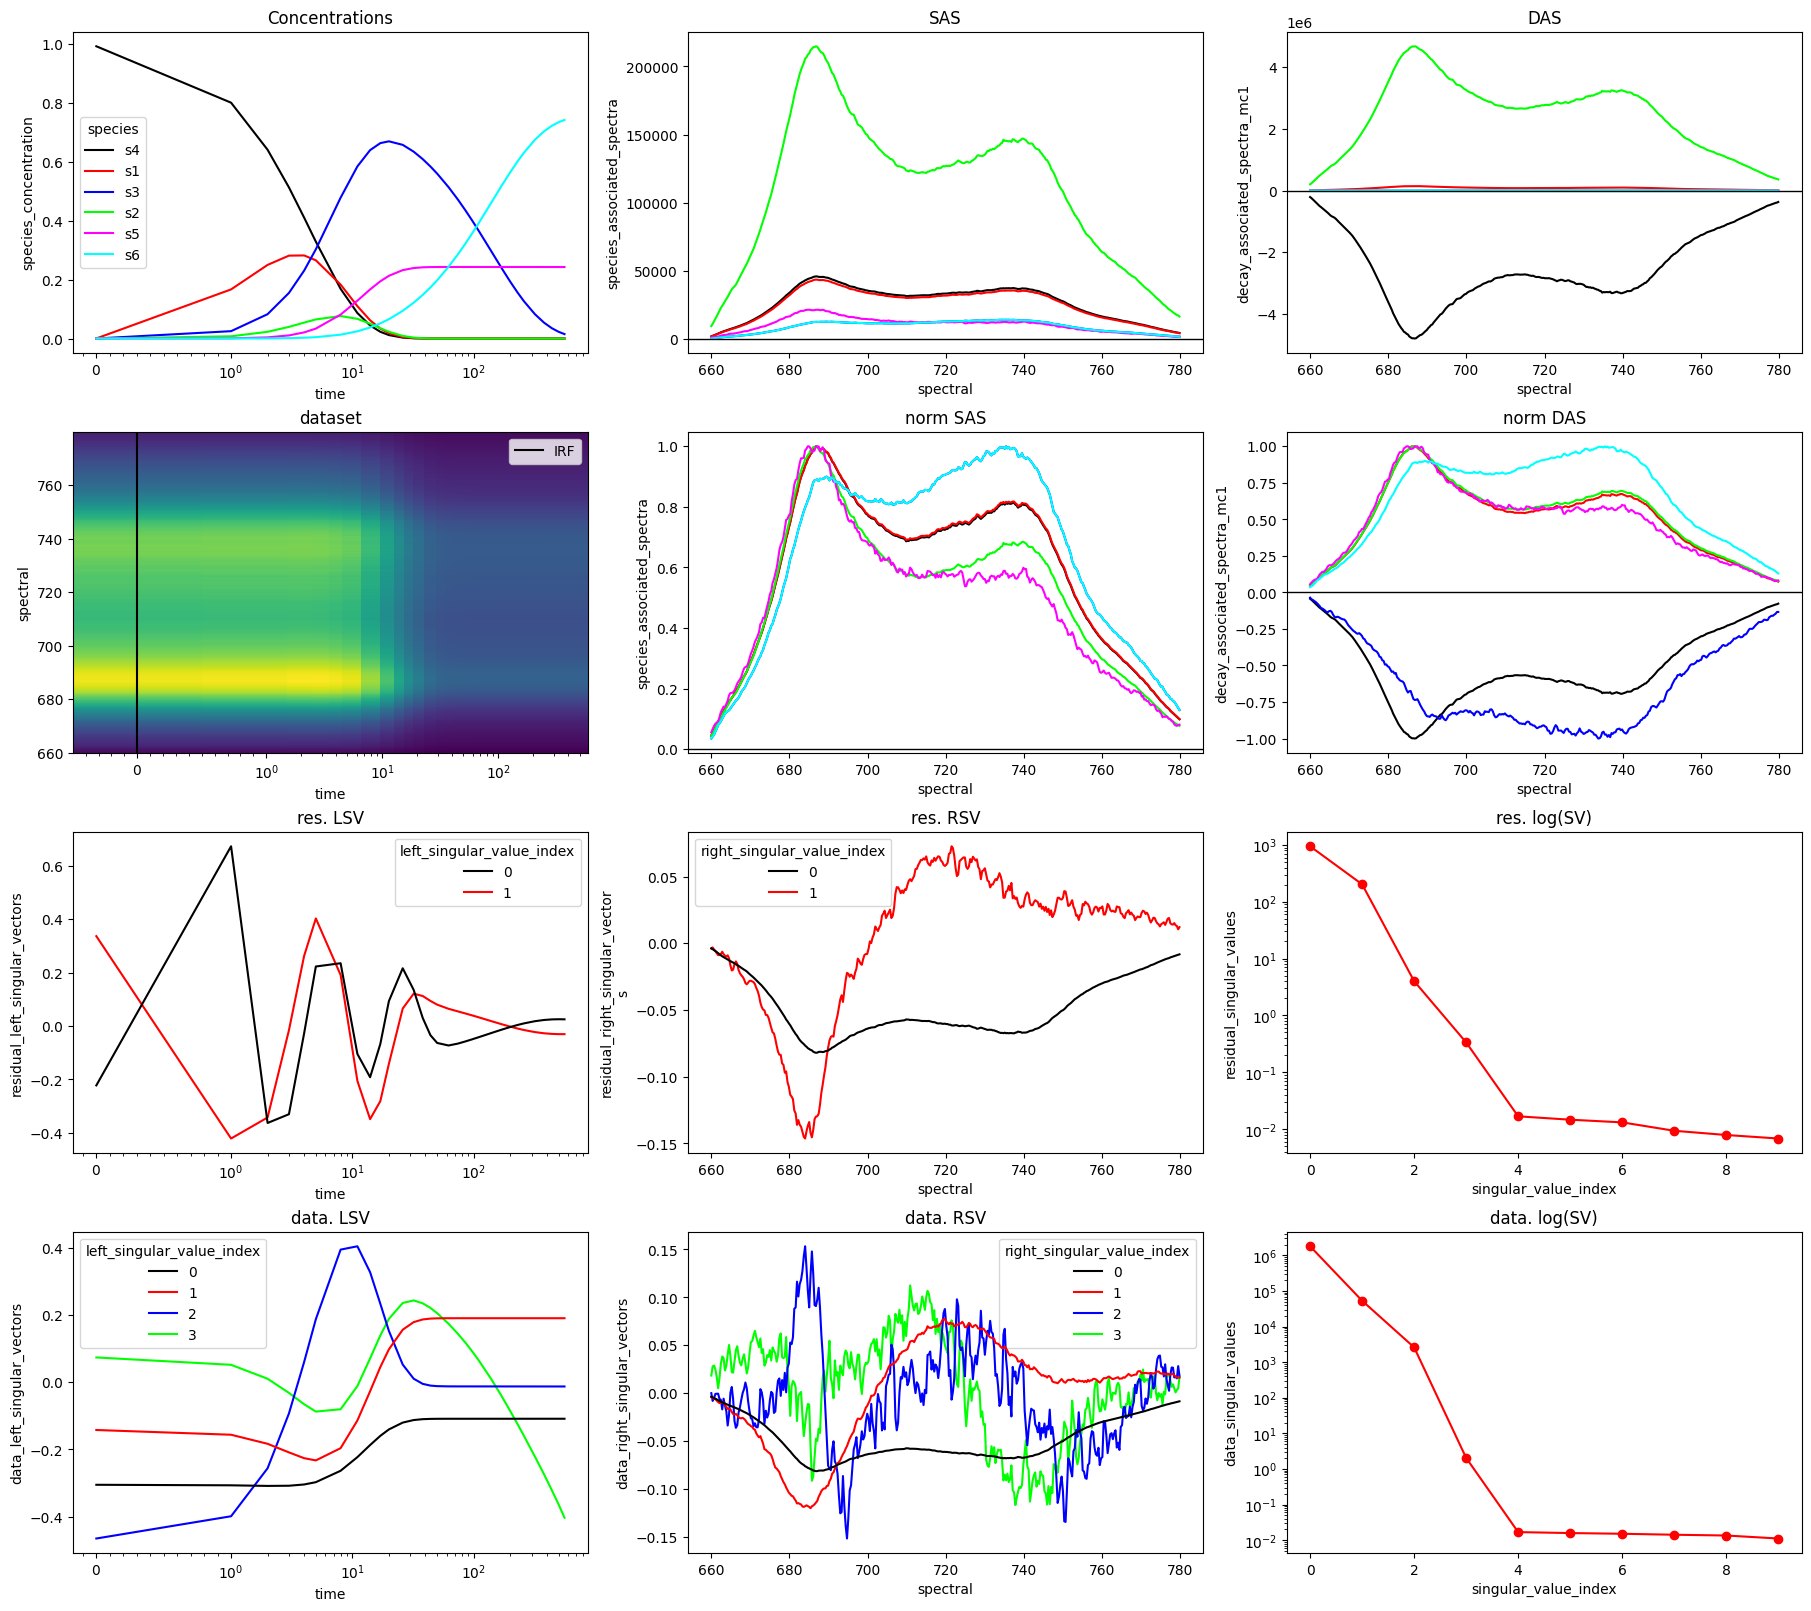

In [ ]:
from pyglotaran_extras import plot_overview
from pyglotaran_extras.compat import convert

result_plot, _ = plot_overview(convert(result.data["dataset1"]), linlog=True, show_data=True)

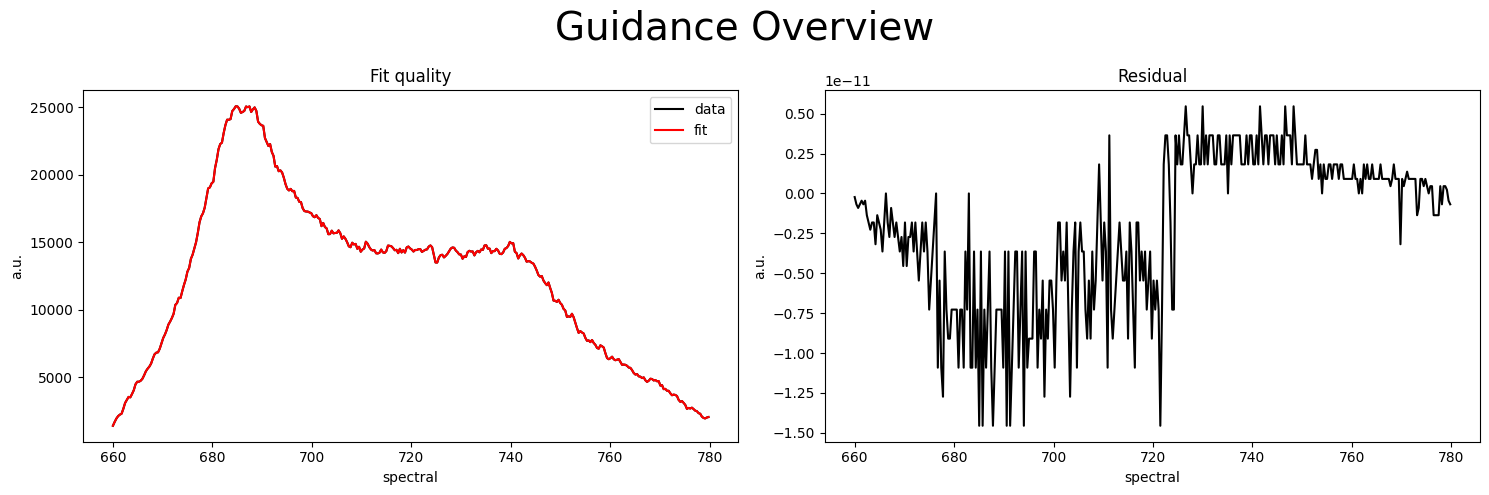

In [ ]:
guide, _ = plot_overview(convert(result.data["dataset2"]), linlog=True, show_data=True)